In [1]:
import numpy as np
from pathlib import Path
from PIL import Image, ImageEnhance
from matplotlib.pyplot import imshow
from IPython.display import display
import pandas as pd
from osgeo import gdal
import keras

In [2]:
tif_list = [f for f in Path('..').iterdir() if f.is_file()]
tif_list

[PosixPath('../docker_image.dockerfile'),
 PosixPath('../BigEarthNet-v1.0.tar.gz'),
 PosixPath('../imageRGB13.tif'),
 PosixPath('../docker_image_gee.dockerfile'),
 PosixPath('../1_LRB-1982-00503_mndvi_lores.tiff'),
 PosixPath('../1_LRB-1982-00503_mndvi_hires.tiff'),
 PosixPath('../1_LRB-1982-00503_ndvi__hires.tiff'),
 PosixPath('../1_LRB-1982-00503_RBG_hires.tiff'),
 PosixPath('../1_LRB-1982-00503_mndwi_hires.tiff'),
 PosixPath('../1_LRB-1982-00503_ndwi_lores.tiff'),
 PosixPath('../imageRGB15.tif'),
 PosixPath('../imageRGB14.tif'),
 PosixPath('../1_LRB-1982-00503_RBG_lores.tiff'),
 PosixPath('../imageRGB12.tif'),
 PosixPath('../1_LRB-1982-00503_ndvi_hires.tiff'),
 PosixPath('../1_LRB-1982-00503_ndwi_hires.tiff'),
 PosixPath('../combined_v2_utf8.csv'),
 PosixPath('../1_LRB-1982-00503_mndwi_lores.tiff'),
 PosixPath('../docker_image_gee_v2.dockerfile'),
 PosixPath('../docker_image_gee_v3.dockerfile'),
 PosixPath('../1_LRB-1982-00503_ndvi_lores.tiff')]

(256, 256)


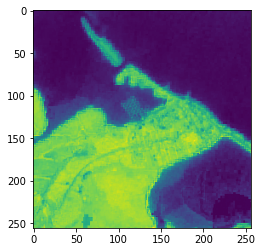

In [3]:
ds = gdal.Open('../1_LRB-1982-00503_mndwi_hires.tiff')
myarray = np.array(ds.GetRasterBand(1).ReadAsArray())
print(myarray.shape)
imshow(myarray)

In [9]:
for f in tif_list:
    if '.tif' not in str(f): continue
    try:
        p = gdal.Open('../1_LRB-1982-00503_mndvi_lores.tiff')
        p
    except:
        print(f, 'is not loadable.')

In [22]:
for f in tif_list:
    if '.tif' not in str(f): continue
    try:
        p = Image.open(f)
        print(f, np.array(p).shape)
        a = np.array(p)
        #a = np.nan_to_num(a)
        #imshow(np.array(p))
        #display(p)
    except:
        print(f, 'is not loadable.')

../imageRGB13.tif (1, 1, 3)
../1_LRB-1982-00503_mndvi_lores.tiff is not loadable.
../1_LRB-1982-00503_mndvi_hires.tiff is not loadable.
../1_LRB-1982-00503_ndvi__hires.tiff (256, 256)
../1_LRB-1982-00503_RBG_hires.tiff (256, 256, 3)
../1_LRB-1982-00503_mndwi_hires.tiff is not loadable.
../1_LRB-1982-00503_ndwi_lores.tiff (256, 256)
../imageRGB15.tif (256, 256, 3)
../imageRGB14.tif (1, 1, 3)
../1_LRB-1982-00503_RBG_lores.tiff (256, 256, 3)
../imageRGB12.tif (1, 1, 3)
../1_LRB-1982-00503_ndvi_hires.tiff (256, 256)
../1_LRB-1982-00503_ndwi_hires.tiff (256, 256)
../1_LRB-1982-00503_mndwi_lores.tiff is not loadable.
../1_LRB-1982-00503_ndvi_lores.tiff (256, 256)


RBG hires 3chan
ndwi 1chan
ndvi 1chan
mndwi 1chan
mndvi 1chan
7 x 2 = 14
14 layer deep (ie 14 channels)
input array shape 256x256x14

In [25]:
p = Image.open('../1_LRB-1982-00503_RBG_lores.tiff')

enhancer = ImageEnhance.Contrast(p)
x = enhancer.enhance(5)



In [28]:
test_mat = np.random.rand(256,256,14)
test_mat.shape

(256, 256, 14)

In [29]:
test_mat

array([[[0.662753  , 0.01160418, 0.68458325, ..., 0.88194572,
         0.43954393, 0.46999181],
        [0.94110793, 0.15695386, 0.50939363, ..., 0.21951589,
         0.84340512, 0.29134684],
        [0.06449242, 0.76864032, 0.98269993, ..., 0.46984966,
         0.49926051, 0.27283337],
        ...,
        [0.05437148, 0.25804524, 0.59808499, ..., 0.05425044,
         0.38941022, 0.47340885],
        [0.87886031, 0.94268188, 0.70252848, ..., 0.90588844,
         0.8791023 , 0.58245714],
        [0.7397775 , 0.05558972, 0.12017723, ..., 0.11603347,
         0.87078233, 0.32172408]],

       [[0.65201607, 0.43975109, 0.38609197, ..., 0.80232477,
         0.07688786, 0.17770245],
        [0.0830868 , 0.42084614, 0.52005642, ..., 0.57131349,
         0.84743733, 0.10002101],
        [0.89671134, 0.55575453, 0.27971785, ..., 0.16686766,
         0.4117038 , 0.82145782],
        ...,
        [0.26434308, 0.34267263, 0.10638525, ..., 0.49641097,
         0.90904187, 0.80679418],
        [0.5

In [27]:
np.array(x).shape

(256, 256, 3)

In [26]:
np.array(x)[-2:]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [141, 126, 121],
        [106,  91,  91],
        [ 71,  51,  31]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [156, 136, 131],
        [106,  91,  91],
        [ 46,  26,  11]]], dtype=uint8)

In [21]:
np.array(p)[-2:]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [37, 34, 33],
        [30, 27, 27],
        [23, 19, 15]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [40, 36, 35],
        [30, 27, 27],
        [18, 14, 11]]], dtype=uint8)

In [ ]:
factor = 1 #gives original image
im_output = enhancer.enhance(factor)
im_output.save('original-image.png')

In [21]:
p1 = Image.open('1_LRB-1982-00503_ndvi_lores.tiff')
print(np.array(p1))

[[ 0.          0.          0.         ... -0.5897436  -0.6571429
  -0.57894737]
 [ 0.          0.          0.         ... -0.68421054 -0.47368422
  -0.26666668]
 [ 0.          0.          0.         ... -0.42307693 -0.61904764
  -0.52380955]
 ...
 [        nan         nan         nan ...  0.34075052  0.47996026
   0.3907875 ]
 [        nan         nan         nan ...  0.26499578  0.25214648
   0.3907875 ]
 [        nan         nan         nan ...  0.22192995  0.25214648
   0.3928071 ]]


AttributeError: 'TiffImageFile' object has no attribute 'min'

(256, 256, 3)


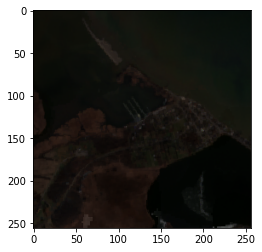

In [25]:
p = Image.open('1_LRB-1982-00503_RBG_hires.tiff')
a = np.array(p)
print(a.shape)
a = np.nan_to_num(a)
imshow(a)

In [24]:
np.array(photo).shape

(256, 256, 3)

In [25]:
! https://console.cloud.google.com/storage/browser/pollutemenot-ai/GEE_dataset?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&authuser=0&project=linen-flux-304115&prefix=&forceOnObjectsSortingFiltering=false

/bin/sh: 1: Syntax error: word unexpected (expecting ")")
